In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import json
from dataset import TreeCoverLossDataset, DriverTypeDataset
from visualizer import TreeLossVisualizer
from correlation_analysis import scatter_plot_for_correlation_analysis
from correlation_analysis import regression_error_visualization
from correlation_analysis import upperbound_regression_error_visualization
import pandas as pd
import matplotlib.pyplot as plt
from prediction_accuracy_test import validate_predictions
from visualizer import visualize_drivers
from visualizer import visualize_predictions

# Part 1: Dataset Statistics
This following notebook calculates the basic statistics of the dataset and visualizes the histogram of the number of records per country/driver and the histogram of the number of records per year.

- Author: Xinshuang Liu, Haoyu Hu
- Email: xil235@ucsd.edu, hah034@ucsd.edu

In [2]:
def convert_list_to_histogram(data_list, save_path, title, fontsize=12, bins=6):
    """
    Converts a list of values into a histogram and saves the plot.

    Args:
        data_list (list): List of numerical data for histogram.
        save_path (str): Path to save the histogram image.
        title (str): Title of the histogram.
        fontsize (int): Font size for axis labels and title.
        bins (int): Number of bins for the histogram.
    """
    assert isinstance(data_list, list), "data_list must be a list of numerical values."
    assert len(data_list) > 0, "data_list cannot be empty."

    plt.figure(figsize=(10, 6))
    plt.hist(data_list, bins=bins, edgecolor="black", alpha=0.7)
    plt.title(title, fontsize=fontsize + 2, fontweight="bold")
    plt.xlabel("Value", fontsize=fontsize)
    plt.ylabel("Frequency", fontsize=fontsize)
    plt.grid(axis="y", linestyle="--", alpha=0.8)
    plt.savefig(save_path)
    plt.show()


def dataset_statistics(dataset):
    """
    Computes basic statistics and generates histograms for the dataset.

    Args:
        dataset (TreeCoverLossDataset | DriverTypeDataset): The dataset object.

    Returns:
        dict: A dictionary containing basic statistics of the dataset.
    """
    assert isinstance(
        dataset, (TreeCoverLossDataset, DriverTypeDataset)
    ), "dataset must be an instance of TreeCoverLossDataset or DriverTypeDataset."

    # Create a directory for saving statistics if it doesn't exist
    os.makedirs("Statistics", exist_ok=True)

    # Compute the number of records for each country/driver
    record_count = {}
    for data, _ in dataset:
        record_count[_] = len(data)

    # Visualize the distribution of records per country/driver
    if isinstance(dataset, TreeCoverLossDataset):
        convert_list_to_histogram(
            list(record_count.values()),
            "Statistics/Distribution of Number of Records per Country.png",
            "Distribution of Number of Records per Country",
        )
    elif isinstance(dataset, DriverTypeDataset):
        convert_list_to_histogram(
            list(record_count.values()),
            "Statistics/Distribution of Number of Records per Driver.png",
            "Distribution of Number of Records per Driver",
        )

    # Compute the number of records for each year
    year_count = {}
    for data, _ in dataset:
        for year in data[:, 0]:
            year = int(year + 0.5)  # Round year to the nearest integer
            year_count[year] = year_count.get(year, 0) + 1

    # Visualize the distribution of records per year
    if isinstance(dataset, TreeCoverLossDataset):
        convert_list_to_histogram(
            list(year_count.values()),
            "Statistics/Distribution of Number of Records per Year across Countries.png",
            "Distribution of Number of Records per Year across Country",
        )
    elif isinstance(dataset, DriverTypeDataset):
        convert_list_to_histogram(
            list(year_count.values()),
            "Statistics/Distribution of Number of Records per Year across Drivers.png",
            "Distribution of Number of Records per Year across Drivers",
        )

    # Compute basic statistics
    number_of_data = len(record_count)
    number_of_years = len(year_count)

    tree_cover_loss_all = []
    co2_all = []
    years_all = []
    for data, _ in dataset:
        years_all.extend(data[:, 0].tolist())
        tree_cover_loss_all.extend(data[:, 1].tolist())
        co2_all.extend(data[:, 2].tolist())

    tree_cover_loss_all_np = np.array(tree_cover_loss_all)
    co2_all_np = np.array(co2_all)
    mean_of_tree_cover_loss = tree_cover_loss_all_np.mean()
    mean_of_co2 = co2_all_np.mean()
    std_of_tree_cover_loss = tree_cover_loss_all_np.std()
    std_of_co2 = co2_all_np.std()
    median_of_years = np.median(years_all)

    # Prepare basic statistics
    basic_statistics = {
        "Number of Data (Countries/Driver Types)": number_of_data,
        "Number of Years": number_of_years,
        "Mean of Tree Cover Loss": mean_of_tree_cover_loss,
        "Mean of CO2": mean_of_co2,
        "Std of Tree Cover Loss": std_of_tree_cover_loss,
        "Std of CO2": std_of_co2,
        "Median of Years": median_of_years,
    }

    # Save statistics to a JSON file
    output_file = (
        "Statistics/Basic Statistics Countries.json"
        if isinstance(dataset, TreeCoverLossDataset)
        else "Statistics/Basic Statistics Drivers.json"
    )
    with open(output_file, "w") as f:
        json.dump(basic_statistics, f, indent=4)

    return basic_statistics


def print_json(json_file):
    """
    Prints a JSON file in a readable format.

    Args:
        json_file (dict): A dictionary containing the JSON data.
    """
    assert isinstance(json_file, dict), "json_file must be a dictionary."
    for k, v in json_file.items():
        print(f"{k}: {v}")

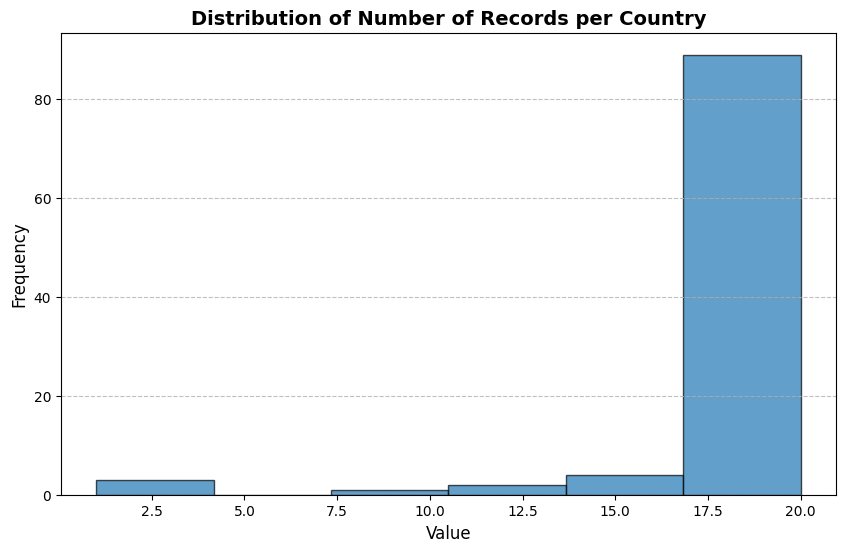

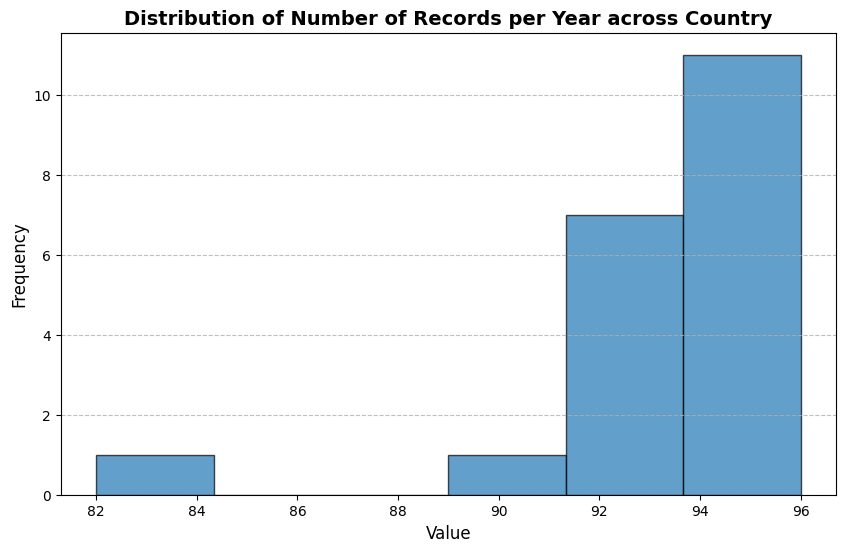

Number of Data (Countries/Driver Types): 99
Number of Years: 20
Mean of Tree Cover Loss: 35241.32757604216
Mean of CO2: 23421820.04351023
Std of Tree Cover Loss: 162808.0931897569
Std of CO2: 108074813.65062383
Median of Years: 2010.0


In [3]:
############################################################################
# Example Usage: TreeCoverLossDataset and DriverTypeDataset
# ---------------------------------------------------------
# This part analyzes datasets of tree cover loss and CO2 emissions to:
#
# 1. **Generate Visualizations**:
#    - Histogram of the number of records per country or driver.
#    - Histogram of the number of records per year.
#
# 2. **Calculate Statistics**:
#    - Number of countries or driver types in the dataset.
#    - Number of years represented in the records.
#    - Mean and standard deviation of tree cover loss.
#    - Mean and standard deviation of CO2 emissions.
#    - Median year of all records.
############################################################################
dataset = TreeCoverLossDataset("input_data/TreeCoverLoss_2001-2020 _InPrimaryForest.csv")
basic_statistics = dataset_statistics(dataset)
print_json(basic_statistics)

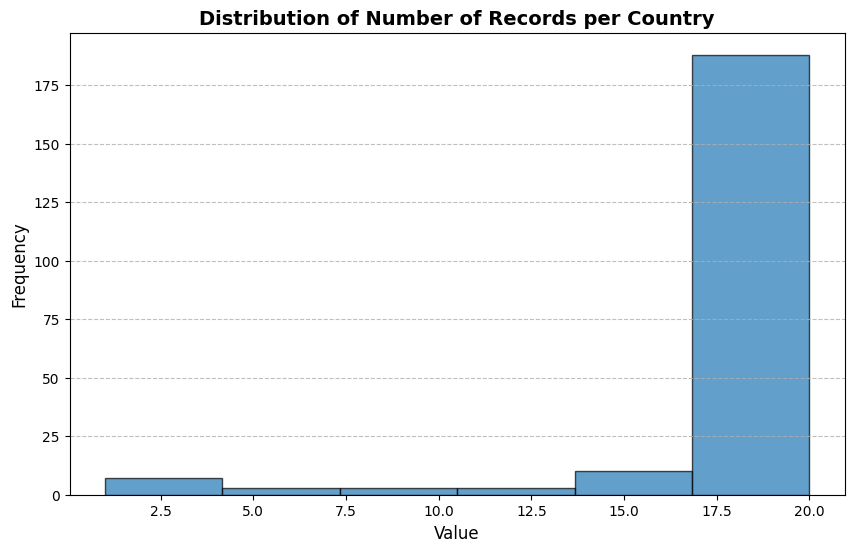

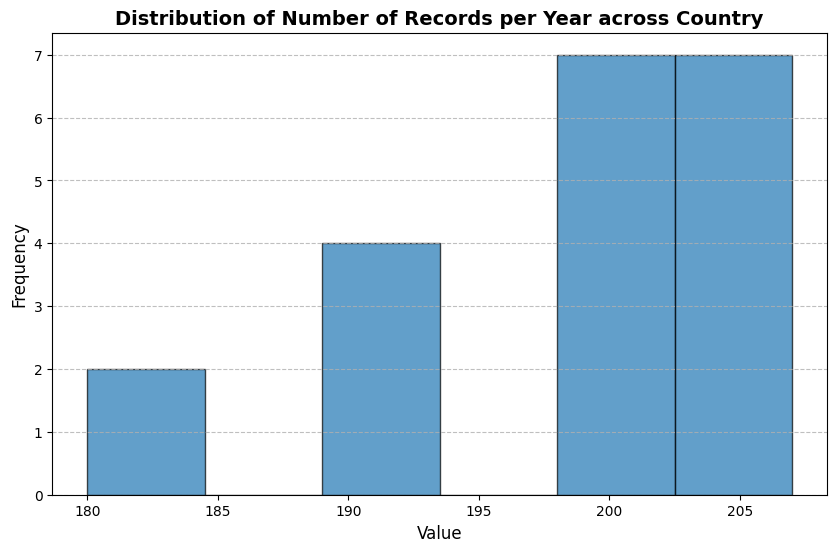

Number of Data (Countries/Driver Types): 214
Number of Years: 20
Mean of Tree Cover Loss: 103698.94074058531
Mean of CO2: 41604199.44815443
Std of Tree Cover Loss: 426795.1186891946
Std of CO2: 168701432.12203524
Median of Years: 2010.0


In [4]:
dataset = TreeCoverLossDataset("input_data/TreeCoverLoss_2001-2020_ByRegion.csv")
basic_statistics = dataset_statistics(dataset)
print_json(basic_statistics)

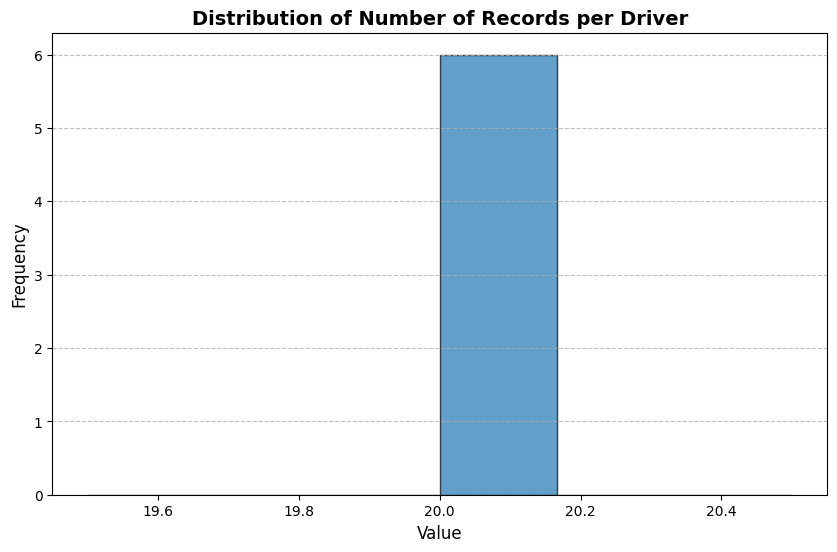

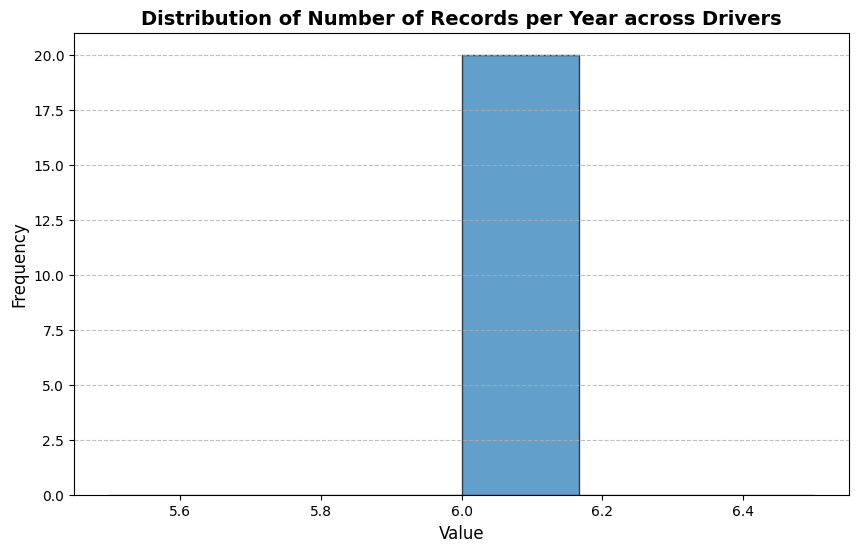

Number of Data (Countries/Driver Types): 6
Number of Years: 20
Mean of Tree Cover Loss: 3428114.1421875
Mean of CO2: 1375365495.9333334
Std of Tree Cover Loss: 2511359.050089085
Std of CO2: 1246965544.0527112
Median of Years: 2010.5


In [5]:
dataset = DriverTypeDataset("input_data/TreeCoverLoss_2001-2020_DominantDrivers.csv")
basic_statistics = dataset_statistics(dataset)
print_json(basic_statistics)

## Intuitions gained to design models and experiments

- The std of the data is much larger than the mean of the data. This motivates us to develop a model that is robust to data variations.
- The number of records is very imbalance across years and countries. This indicates that we need to split the training and testing data based on a threshold instead of a fixed proportion of the data.
- The median of the years in all records is 2010. Thus, we can use 2010 as a threshold to split the train and test data, making each of them count for half of the entire dataset.

# Part 2: Visualization
This following notebook visualizes tree cover loss and CO2 emission across countries and regions on maps as well as bar charts of rankings, and also shows an annual trend of tree cover loss and CO2 emission in the USA and over the world.

In [6]:
visualizer = TreeLossVisualizer('input_data/TreeCoverLoss_2001-2020_ByRegion.csv')

In [7]:
visualizer.map_country("TreeCoverLoss_ha", "Global Tree Cover Loss by Country", "Reds","Tree Cover Loss (Ha)", output_mode="show")
visualizer.map_region("TreeCoverLoss_ha", "Global Tree Cover Loss by Sub-Region", "Reds","Tree Cover Loss (Ha)", output_mode="show")
visualizer.top_countries("TreeCoverLoss_ha", "Top 10 Countries by Tree Cover Loss", output_mode="show")
visualizer.top_regions("TreeCoverLoss_ha", "Tree Cover Loss by Sub-Region","Tree Cover Loss (Ha)", output_mode="show")
visualizer.country_trend("USA", "TreeCoverLoss_ha", "Tree Cover Loss for USA by Year", "blue", output_mode="show")
visualizer.global_trend("TreeCoverLoss_ha", "Total Tree Cover Loss Worldwide by Year", "green","Tree Cover Loss (Ha)", output_mode="show")

In [8]:
visualizer.map_country("GrossEmissions_Co2_all_gases_Mg", "Global Gross Emissions by Country", "Blues","Gross CO2 Emissions (Mg)", output_mode="show")
visualizer.map_region("GrossEmissions_Co2_all_gases_Mg", "Global Gross Emissions by Sub-Region", "Blues","Gross CO2 Emissions (Mg)", output_mode="show")
visualizer.top_countries("GrossEmissions_Co2_all_gases_Mg", "Top 10 Countries by Gross Emissions", output_mode="show")
visualizer.top_regions("GrossEmissions_Co2_all_gases_Mg", "Gross Emissions by Sub-Region","Gross CO2 Emissions (Mg)", output_mode="show")
visualizer.country_trend("USA", "GrossEmissions_Co2_all_gases_Mg", "Gross Emissions for USA by Year", "orange", output_mode="show")
visualizer.global_trend("GrossEmissions_Co2_all_gases_Mg", "Total Gross Emissions Worldwide by Year", "purple","Gross CO2 Emissions (Mg)", output_mode="show")


# Part 3: Correlation_analysis
This following notebook visualizes the correlation_analysis between tree cover loss and CO2 emission, including scatter plot, regression error and upperbound analysis.

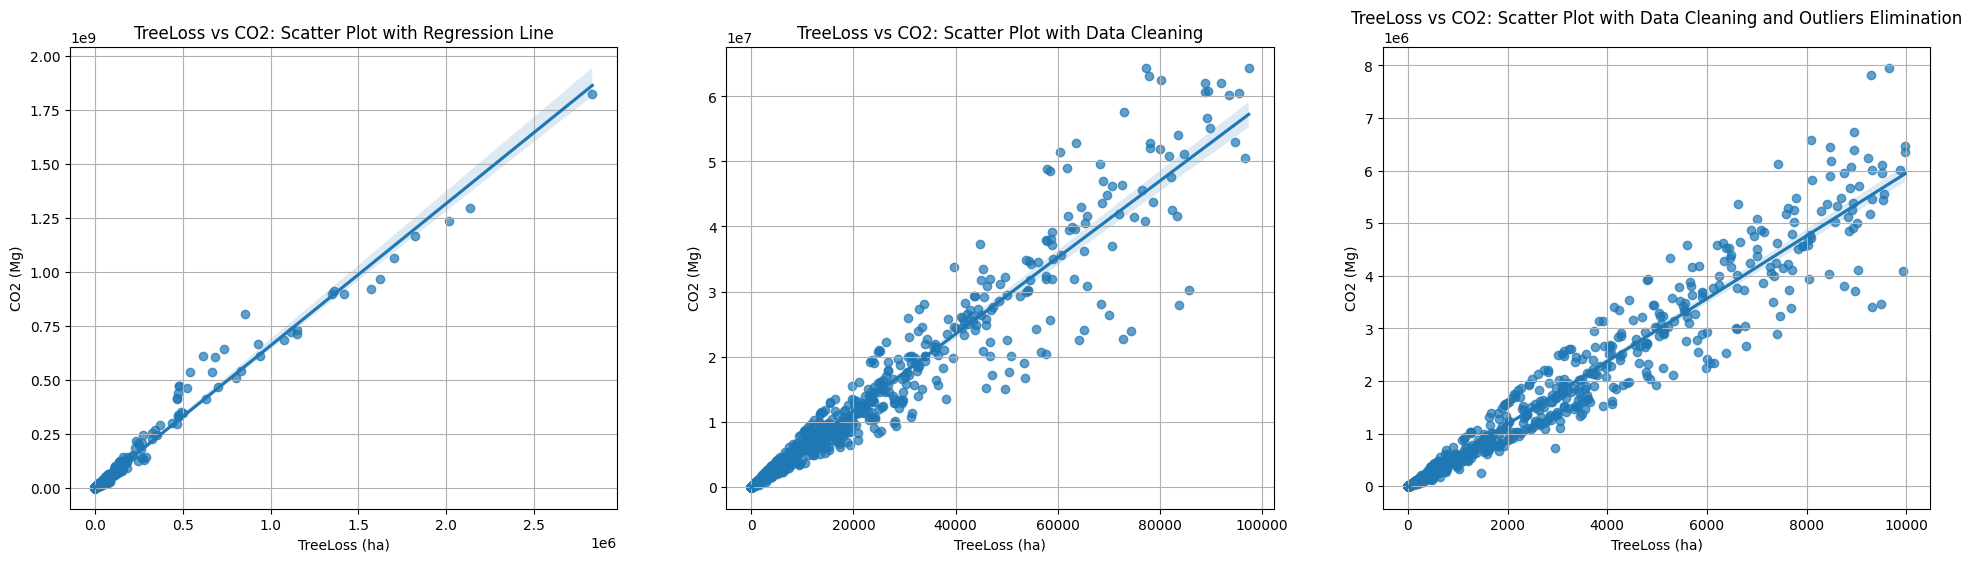

In [9]:
scatter_plot_for_correlation_analysis()

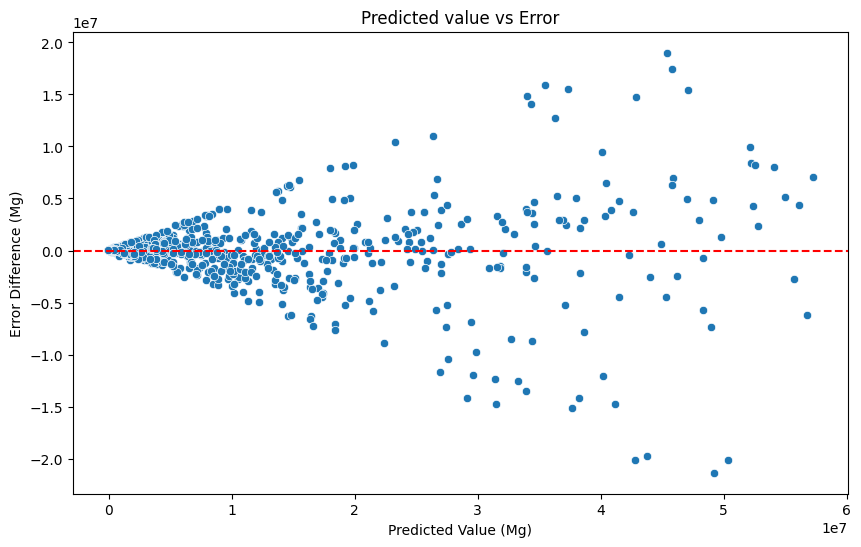

In [10]:
regression_error_visualization()

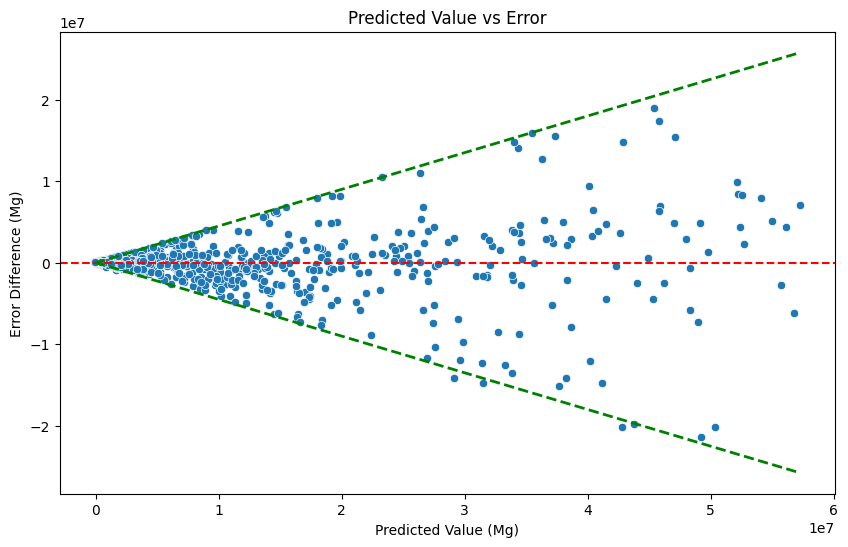

In [11]:
upperbound_regression_error_visualization()

using this correlation for accuracy testing

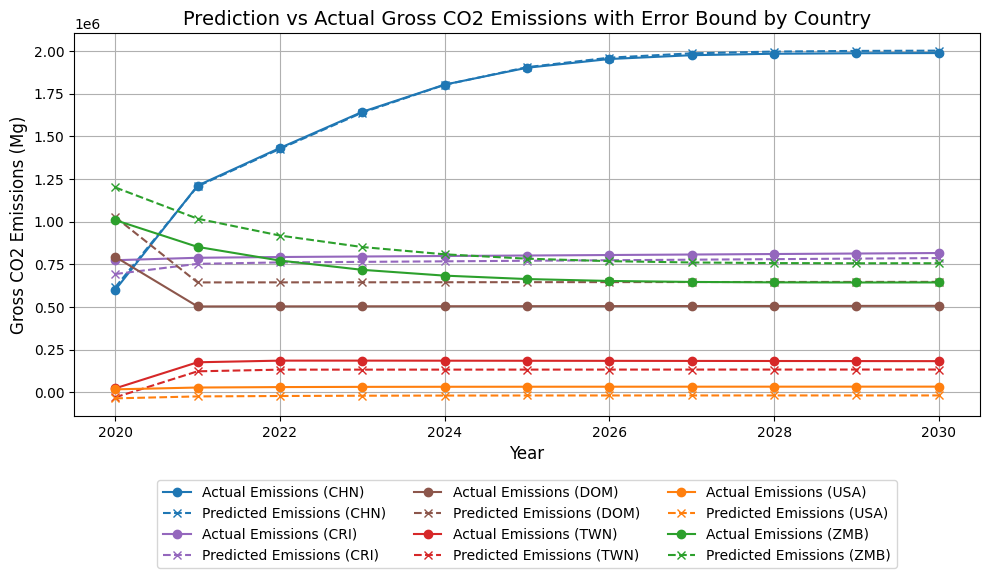

In [12]:
data = pd.read_csv("output_data/prediction_InPrimaryForest.csv")
df = pd.DataFrame(data)

accuracies = []
lower_bounds = []
upper_bounds = []
predicted_emissions = []

for _, row in df.iterrows():
    is_accurate, lower_bound, upper_bound, predicted_gross_emissions = validate_predictions(
        row['TreeCoverLoss_ha'], row['GrossEmissions_Co2_all_gases_Mg']
    )
    accuracies.append(is_accurate)
    lower_bounds.append(lower_bound)
    upper_bounds.append(upper_bound)
    predicted_emissions.append(predicted_gross_emissions)

df['is_accurate'] = accuracies
df['lower_bound'] = lower_bounds
df['upper_bound'] = upper_bounds
df['predicted_gross_emissions'] = predicted_emissions

grouped = df.groupby('CountryCode')


colors = {
            'CHN':'#1f77b4',
            'USA':'#ff7f0e',
            'ZMB':'#2ca02c',
            'TWN':'#d62728',
            'CRI':'#9467bd',
            'DOM':'#8c564b',
            # 'IND':'#e377c2',
            # 'KHM':'#7f7f7f',
            # 'LAO':'#bcbd22'
        }

# visualization
plt.figure(figsize=(10, 6))

for country, group in grouped:
    color = colors.get(country, 'gray')
    if color == 'gray':
        continue

    plt.plot(group['Year'], group['GrossEmissions_Co2_all_gases_Mg'], label=f"Actual Emissions ({country})",
             marker='o', linestyle='-', color=color)
    plt.plot(group['Year'], group['predicted_gross_emissions'], label=f"Predicted Emissions ({country})", marker='x',
             linestyle='--', color=color)
    # plt.fill_between(group['Year'], group['lower_bound'], group['upper_bound'], color='red', alpha=0.3,
    #                  label=f"Error Bound ({country})")

plt.title("Prediction vs Actual Gross CO2 Emissions with Error Bound by Country", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Gross CO2 Emissions (Mg)", fontsize=12)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.grid(True)

plt.tight_layout()
plt.show()

# Part 4: Driver Visualization

In [13]:
visualize_drivers("input_data/TreeCoverLoss_2001-2020_DominantDrivers.csv")

# Part 5: Predicted with Actual Data

In [14]:
visualize_predictions()